<h1>PDIoT Data Analysis</h1>
<p>Hopefully by now you have collected some HAR data. This comprises of 3-axis accelerometer data and can be explored further by using this Jupyter Notebook.</p>

<h3>Accelerometer</h3>
<ul>
    <li>Measures acceleration (including gravity)</li>
    <li>Observing the change in direction of gravity often more useful than linear acceleration due to movement</li>
    <li>Sensor values given in g along the axis of interest</li>
    <li>Placing our sensor flat on the table should give -1g on the Z axis and 0g on the other axes</li>
    <li>Cheap to buy and low power consumption</li>
</ul>


<h2>Human Activity Recognition</h2>

<p>Your are expected to research and develop the HAR algorithm yourselves during the course. A useful first stage  will be to look at some activity data visually to understand how the sensors react to different types of movement when mounted in different positions.</p>

<p>You are free to use any programming language for the data analysis part of the project, but we recommend using Python and Jupyter Notebook to quickly explore ideas. Below is a simple example using Python/Pandas to graph acceleration data from a sample of walking data.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
filename = "./Data/s123456_Walking at normal speed_Chest_Left_1600702738714.csv"
header_size = 5

with open(filename) as f:
    head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
    for l in head:
        print(l)
        

Sensor position: Chest
Sensor side: Left
Activity type: Walking at normal speed
Activity code: 1
Subject id: s123456


In [3]:
df = pd.read_csv(filename, header=header_size)
print(df)

         timestamp  seq   accel_x   accel_y   accel_z
0    1600702741096    0 -0.003174  0.952332  0.140076
1    1600702741099    1 -0.003174  0.952332  0.140076
2    1600702741099    2  0.000244  0.951111  0.140808
3    1600702741101    3  0.000244  0.951111  0.140808
4    1600702741102    4  0.003662  0.952332  0.142517
..             ...  ...       ...       ...       ...
443  1600702756265  443  0.096680  1.062439  0.086853
444  1600702756266  444 -0.187500  0.667908  0.028992
445  1600702756266  445  0.001709  0.827576  0.117859
446  1600702756268  446  0.096680  1.062439  0.086853
447  1600702756269  447  0.001709  0.827576  0.117859

[448 rows x 5 columns]


<IPython.core.display.Javascript object>


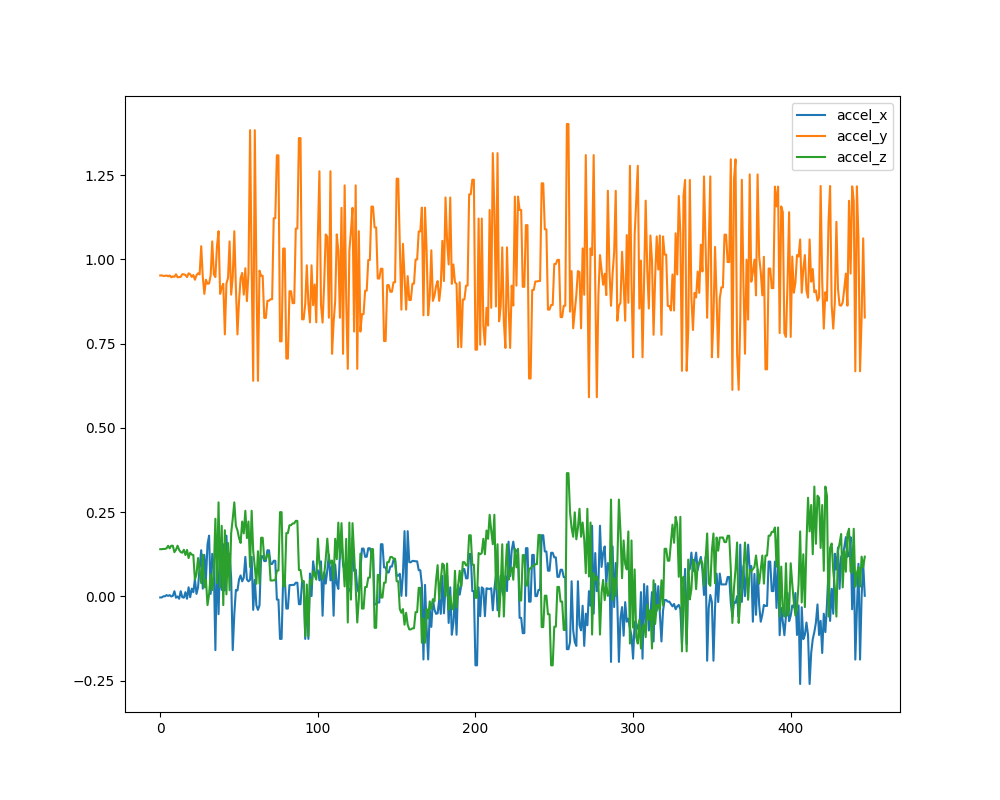

In [4]:
fig = plt.figure(figsize=(10, 8))
plt.plot(df['accel_x'], label="accel_x")
plt.plot(df['accel_y'], label="accel_y")
plt.plot(df['accel_z'], label="accel_z")
plt.legend()

Begin by visually inspecting a set of different activities and different sensor mounting positions, to see how they might best be differentiated. Then you can begin to analyse windows of data for the signal and try to categorise it into the different activities.

## Common techniques to consider

* There are two main ways in which you can tackle this HAR task: using Machine Learning algorithms (Random Forest Classifier (RFC), Clustering, Regression etc), or Deep Learning methods (Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN) etc).


* The most common way to preprocess time series data is to divide it into sliding windows (you can choose how much they overlap).


* The sliding windows can then be directly passed to your algorithm (for example the CNN), or you can extract features of the signal from the windows and pass a vector of features to the classification algorithm (for example, a RFC). 


* Be very careful about splitting the data into training, validation and test sets. Your algorithms will perform extremely well when data is coming from the same subject. You need to test your algorithms with a technique called Leave One Subject Out Cross Validation (LOSOXV) whereby you test your method on data from an unseen subject.